In [1]:
import pandas as pd
import numpy as np
import fitparse
import math
import plotnine as p9
import os
import fit_functions

In [12]:
dateien = os.listdir()
dateien = [datei for datei in dateien if 'i7' in datei]

gesamt_df = pd.DataFrame()
for datei in dateien:
    print (datei)
    df = fit_functions.parse_fit(datei)
    gesamt_df = pd.concat([gesamt_df,df], ignore_index=True)
gesamt_summary=fit_functions.calc_summary(gesamt_df)

i75441992.fit
i75442001.fit
i75442026.fit
i75442041.fit
i75442056.fit
i75807787.fit
i76171730.fit
i76947269.fit
i77457859.fit


In [13]:
gesamt_summary = gesamt_summary.query("km>0").query("distance>500").reset_index(drop=True)
gesamt_summary

,km,source,hr,step_length,cadence,power,sec,distance,sec_km,kmh
0,1,i75441992.fit,147.600000,1036.594030,173.110448,354.304478,334,998.97,334.344375,10.767341
1,2,i75441992.fit,146.061765,1015.673529,172.358824,342.055882,339,999.04,339.325753,10.609274
2,3,i75441992.fit,151.780980,1014.628242,171.498559,362.216138,346,1001.70,345.412798,10.422312
3,4,i75441992.fit,151.094286,1002.674286,170.960000,354.634286,349,999.25,349.261946,10.307450
4,5,i75441992.fit,152.151163,1020.398256,170.901163,358.752907,343,999.35,343.223095,10.488805
...,...,...,...,...,...,...,...,...,...,...
99,10,i77457859.fit,151.392655,1011.629944,167.305085,328.155367,353,1000.86,352.696681,10.207071
100,11,i77457859.fit,150.580925,1031.687861,166.236994,333.465318,345,1000.29,344.899979,10.437809
101,12,i77457859.fit,158.111111,1122.958730,168.895238,367.438095,314,998.89,314.348927,11.452242
102,13,i77457859.fit,163.387417,1171.162252,169.450331,384.632450,301,1001.28,300.615213,11.975442


In [30]:
def plotSummary_v_hr(df):
    df = df.head(-1).tail(-1).reset_index(drop=True)
    p=(p9.ggplot(df)
    +p9.geom_point(p9.aes(x='kmh',y='hr', color='source'))
    +p9.geom_smooth(p9.aes(x='kmh',y='hr'), method='lm', se=False, size=.5, color='darkgray')
    +p9.scale_x_continuous(limits=[8,15])
    +p9.facet_wrap('~km')
    +p9.theme_bw()
    +p9.theme(figure_size=[16,9])
    +p9.labs(x='km/h',y='HR', title='HR vs. Geschwindigkeit nach gelaufenem km')
    +p9.theme(legend_key=p9.element_blank())
    )

    return p

C:\Users\wkamyg\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
C:\Users\wkamyg\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
C:\Users\wkamyg\AppData\Roaming\Python\Python311\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


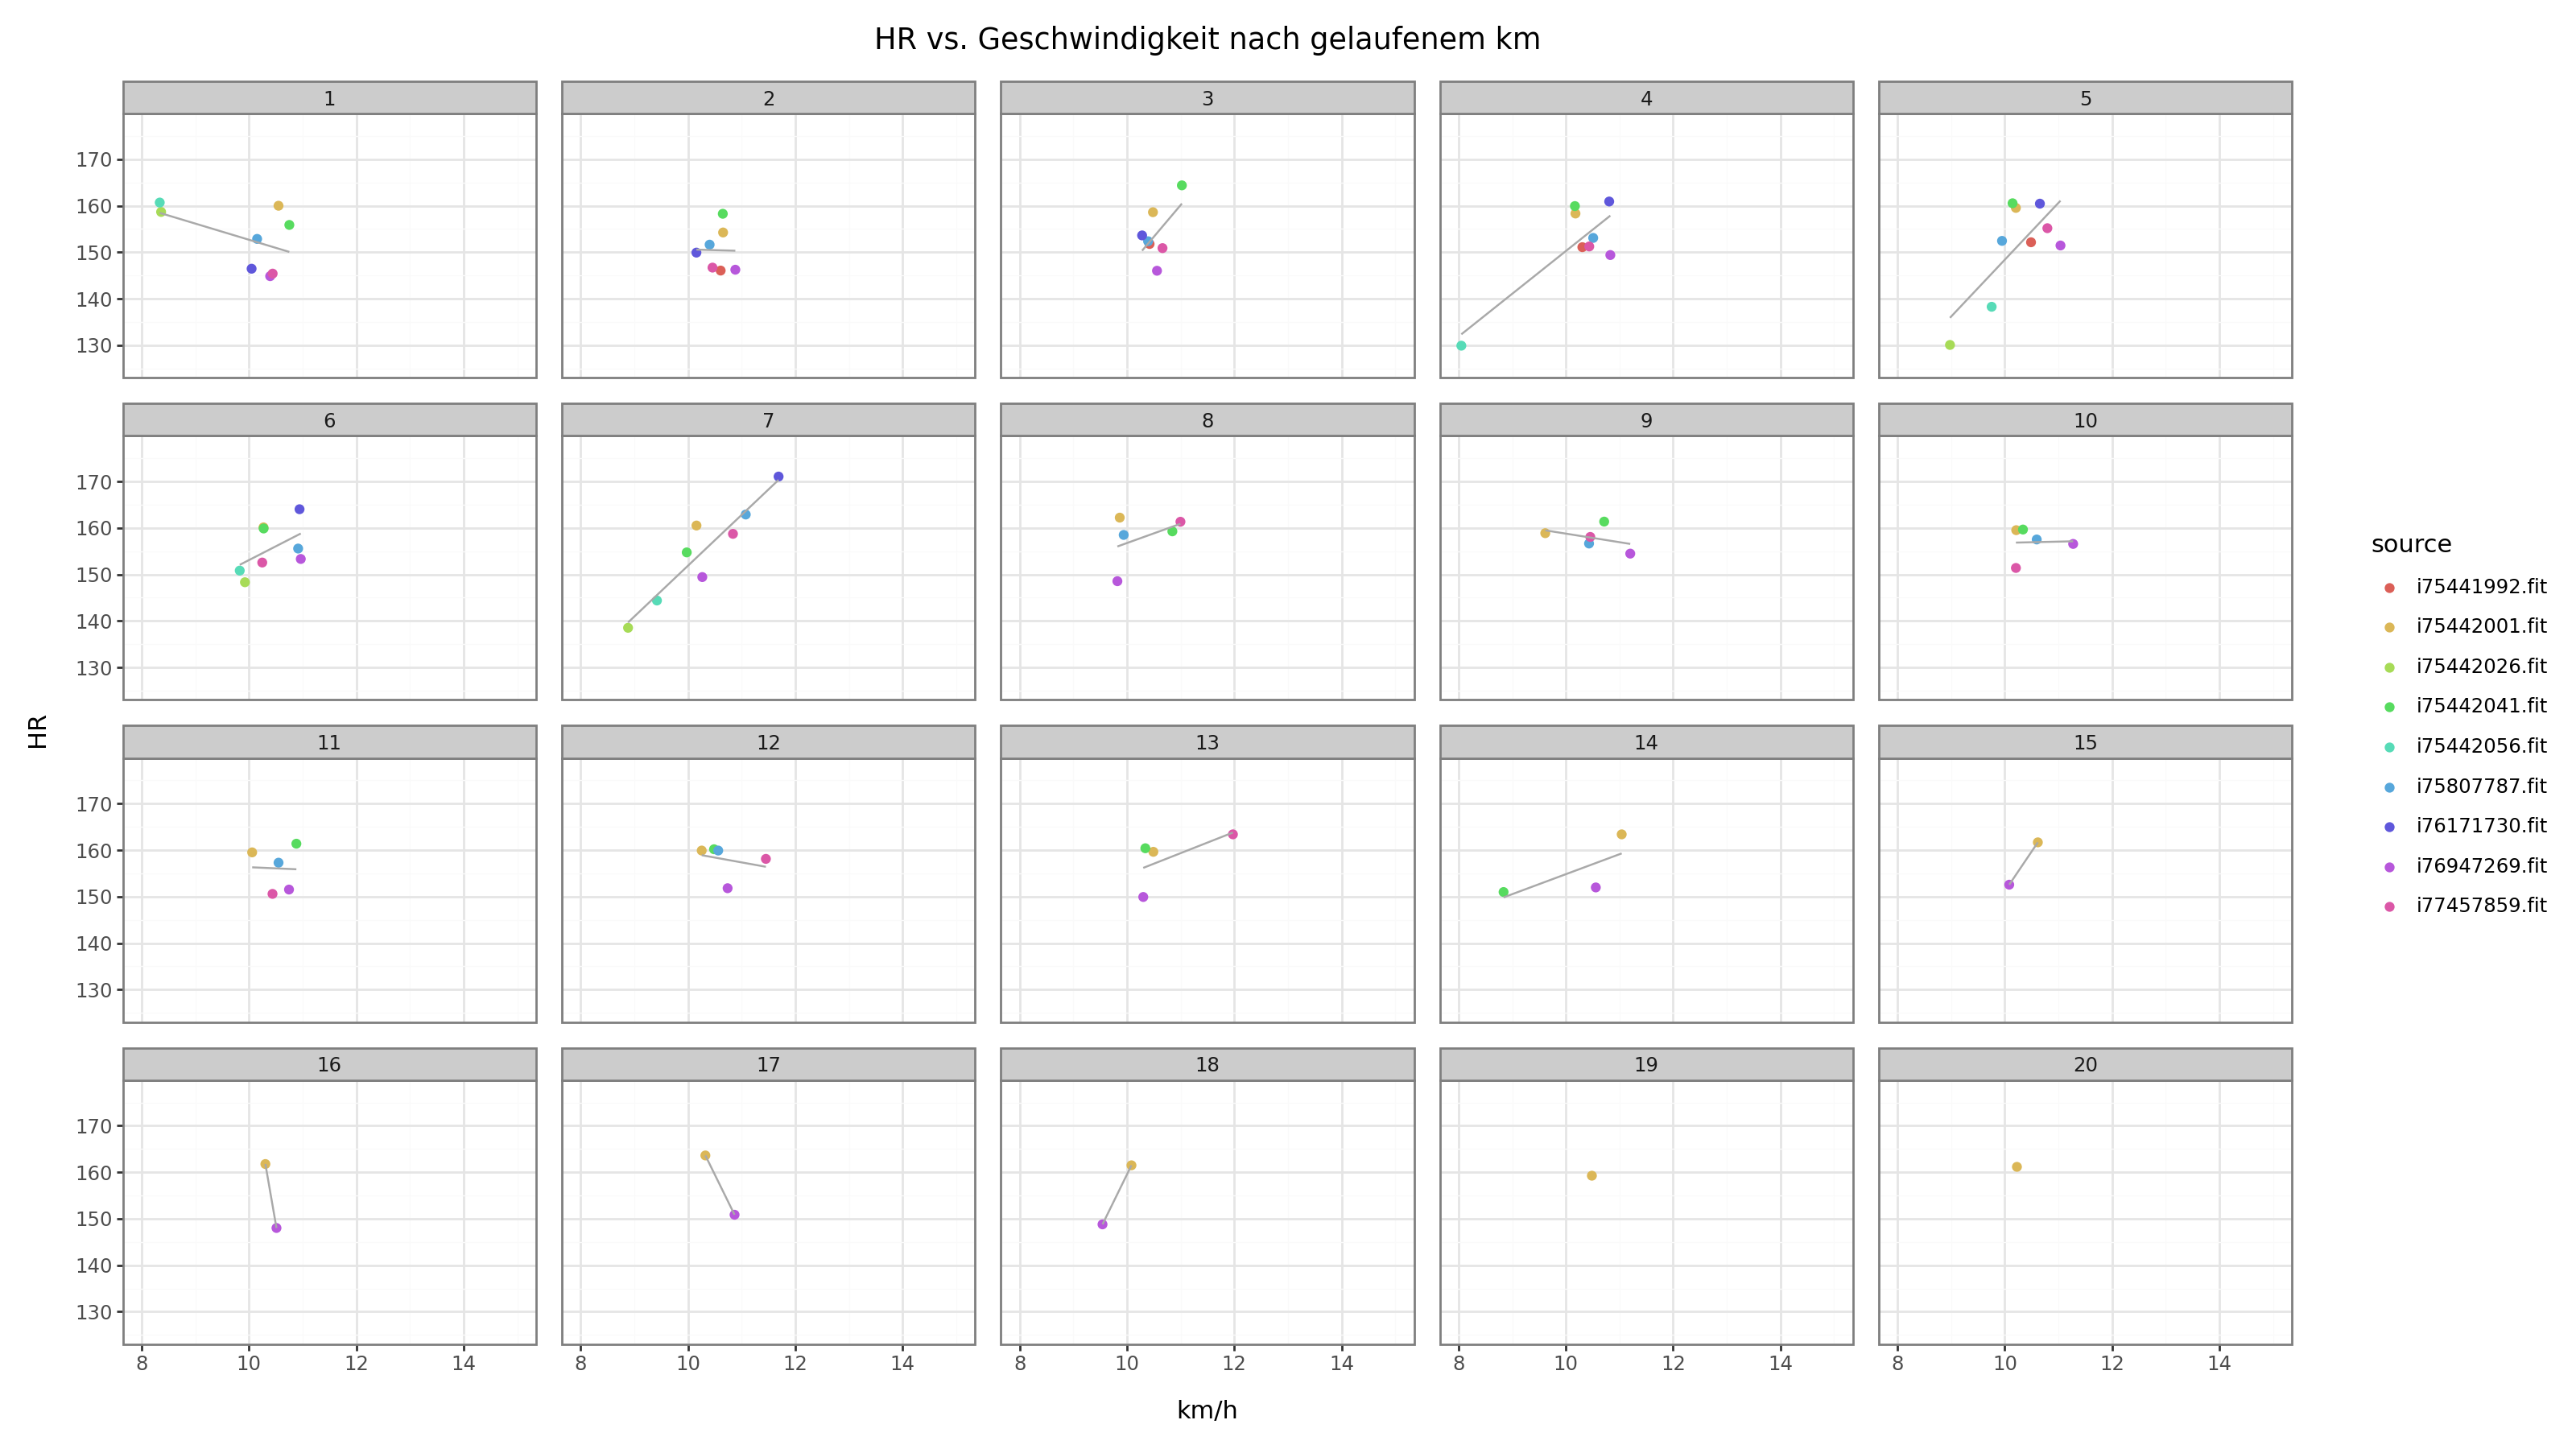

In [31]:
plotSummary_v_hr(gesamt_summary)

In [129]:
a = raw.query("km>0").reset_index(drop=True)
a

,time,distance,hr,power,step_length,cadence,speed,km,sec,kmh
0,2025-05-04 11:05:36,1003.28,172,383.0,1219.0,89,3.667,1,308,13.2012
1,2025-05-04 11:05:37,1006.91,172,382.0,1230.0,89,3.676,1,309,13.2336
2,2025-05-04 11:05:38,1010.51,172,379.0,1225.0,89,3.676,1,310,13.2336
3,2025-05-04 11:05:39,1014.13,172,377.0,1227.0,89,3.686,1,311,13.2696
4,2025-05-04 11:05:40,1017.78,172,375.0,1227.0,89,3.686,1,312,13.2696
...,...,...,...,...,...,...,...,...,...,...
7309,2025-05-04 13:07:25,24617.53,183,345.0,1072.0,89,3.163,24,7617,11.3868
7310,2025-05-04 13:07:26,24619.76,184,347.0,1081.0,86,3.163,24,7618,11.3868
7311,2025-05-04 13:07:27,24621.87,184,346.0,1081.0,86,3.154,24,7619,11.3544
7312,2025-05-04 13:07:28,24622.99,184,316.0,1081.0,80,3.126,24,7620,11.2536
